## Calcoliamo il kernel in Radiation domination seguendo la formula 4.11 di https://arxiv.org/pdf/2502.20137

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special


# RADIATION DOMINATION


Calcolo in corso per x da 1 a 100 con u=3, v=2...


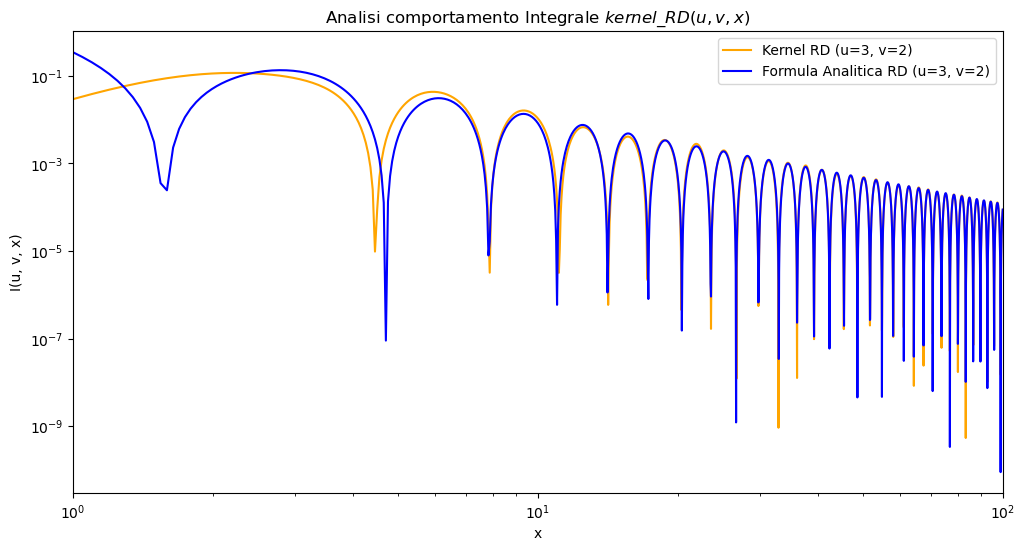

In [11]:
#sound speed
cs=1/np.sqrt(3)

def T_RD(x):
    bracket= np.sin(x*cs)/(x*cs)- np.cos(x*cs)
    Tf=(9/(x**2)) * bracket
    return Tf

def T_derivative_RD(x):
    main_term= np.sin(x*cs)/(x*cs) - np.cos(x*cs)
    first_term=-18/(x**3) * main_term
    second_term= (9/(x**2)) * (np.cos(x*cs)/x -np.sin(x*cs)/(x**2*cs)+np.sin(x*cs)*cs)
    return first_term + second_term



def f_RD(u,v,xb):
    
    U=u*xb
    V=v*xb
    Tu= T_RD(U)
    Tv= T_RD(V)
    Tu_deriv= T_derivative_RD(U)
    Tv_deriv= T_derivative_RD(V)
    
    prefactor=1/9
    first_term= 12*T_RD(u*xb) * T_RD(v*xb)
    second_term=4*xb**2 *u * v * Tu_deriv * Tv_deriv
    third_term=4*xb*(u*Tu_deriv * Tv + v*Tv_deriv * Tu)

    return prefactor * (first_term + second_term + third_term)


def kernel_RD(u,v,x):
    integral,err= integrate.quad(lambda xb: xb*np.sin(x-xb)*f_RD(u, v, xb), 0, x)
    return integral/x

def kernel_formula_RD(u, v, x):
    """
    Calcola il valore analitico asintotico IRD(v, u, x->inf).
    """
    prefactor = (3 * (u**2 + v**2 - 3)) / (4 * u**3 * v**3 * x)
    
    #Termine con il seno
    const_term=-4*u*v
    num=3-(u+ v)**2
    den=3-(u - v)**2
    log_arg=np.abs(num/den)

    second_term= np.sin(x)*(const_term+ (u**2 + v**2 -3)* np.log(log_arg))   
    # Termine con il coseno
    theta=1 if (u + v) >= np.sqrt(3) else 0
    third_term= np.cos(x)*(theta * np.pi * (u**2 + v**2 -3))
    
    result= prefactor * (second_term - third_term)

    return result

u_val = 3
v_val = 2
x_start = 1
x_end = 100     
num_points = 2000  

print(f"Calcolo in corso per x da {x_start} a {x_end} con u={u_val}, v={v_val}...")


x_values = np.linspace(x_start, x_end, num_points)


y_values = []
y_values_formula = []
for val in x_values:
    y = kernel_RD(u_val, v_val, val)
    y=y*y
    y_values.append(y)
    y_formula = kernel_formula_RD(u_val, v_val, val)
    y_formula = y_formula * y_formula
    y_values_formula.append(y_formula)


# --- Grafico ---
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label=f'Kernel RD (u={u_val}, v={v_val})', color='orange')
plt.plot(x_values, y_values_formula, label=f'Formula Analitica RD (u={u_val}, v={v_val})', color='blue')
plt.title(r"Analisi comportamento Integrale $kernel\_RD(u, v, x)$")
plt.xlabel("x")
plt.ylabel("I(u, v, x)")
plt.xlim(x_start, x_end)
plt.xscale('log')
plt.yscale('log')


plt.legend()
plt.show()


### la differenza tra i due integrali deriva dal fatto che la formula analitica 4.11 è un limite per x-> intfinito 

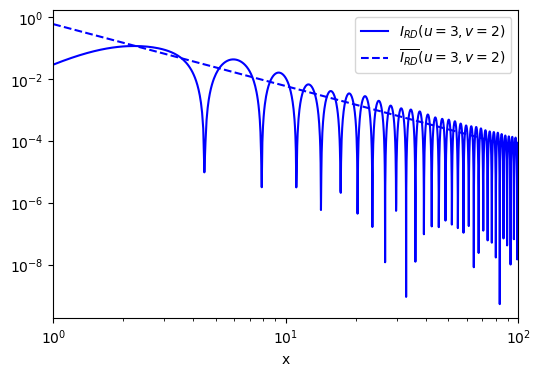

In [ ]:
import numpy as np


def kernel_formula_rd_average(u,v,x):
    prefactor = 1/2 * np.pow((3 * (u**2 + v**2 - 3)) / (4 * u**3 * v**3 * x), 2)
    
    # Second term
    num = 3 - (u + v)**2
    den = 3 - (u - v)**2
    log_arg = np.abs(num / den)
    term_log = (u**2 + v**2 - 3) * np.log(log_arg)
    second_term = -4 * u * v + term_log
    
    # Third term
    theta = 1 if (u + v) >= np.sqrt(3) else 0
    third_term = theta * np.pi**2 * (u**2 + v**2 - 3)**2
    
    result = prefactor * (second_term**2 + third_term)
    return result
    


y_values = []
y_values_formula_avg = []

for x in x_values:
    y = kernel_RD(u_val, v_val, x)
    y=y*y
    y_values.append(y)

    y_average= kernel_formula_rd_average(u_val, v_val, x)
    y_values_formula_avg.append(y_average)



# --- Grafico ---
plt.figure(figsize=(6, 4))
plt.plot(x_values, y_values, label=fr'$I_{{RD}} (u={u_val}, v={v_val})$', color='blue')
plt.plot(x_values, y_values_formula_avg, label=fr'$\overline{{I_{{RD}}}} (u={u_val}, v={v_val})$', color='blue', linestyle='--')

plt.xlabel("x")

plt.xlim(left=1, right=100)
plt.xscale('log')
plt.yscale('log')
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.legend()   
plt.show()   

# MATTER DOMINATION


Calcolo in corso per x da 1 a 100...
Media di Kernel MD: 0.7065218638724527
0.72


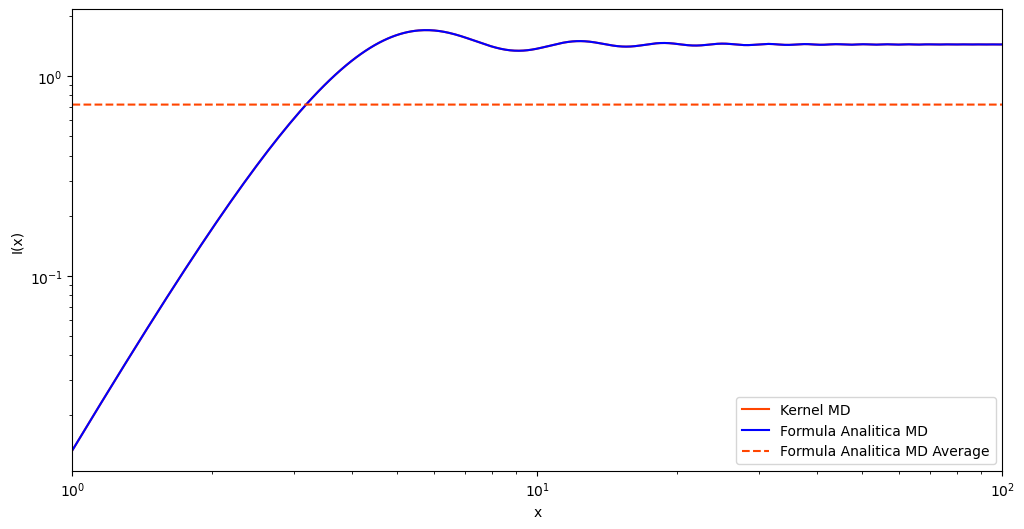

In [13]:
def green_function_MD(x,xb):
    first_term=(1+xb*x)*np.sin(x - xb)
    second_term=(x-xb)*np.cos(x - xb)
    return (first_term - second_term)/(x*xb)


def kernel_MD(x):
    integral,err=integrate.quad(lambda xb: (xb/x)**2 * green_function_MD(x, xb)*(6/5), 0, x)
    return integral


def kernel_formula_MD(x):
    return 6*(x**3+3*x*np.cos(x)-3*np.sin(x))/(5*x**3)

def kernel_formula_average_MD(x):
    return 18/25

u_val = 2
v_val = 2
x_start = 1
x_end = 100
num_points = 2000
print(f"Calcolo in corso per x da {x_start} a {x_end}...")
x_values = np.linspace(x_start, x_end, num_points)
y_values = []
y_values_formula = []
y_values_formula_avg = []
for val in x_values:
    y = kernel_MD(val)
    y_values.append(y*y)
    y_formula = kernel_formula_MD(val)
    y_values_formula.append(y_formula*y_formula)
    y_formula_avg = kernel_formula_average_MD(val)
    y_values_formula_avg.append(y_formula_avg)

#calcolaiamo la media di Kernel md
average_kernel_md = np.mean(y_values)/2
print(f"Media di Kernel MD: {average_kernel_md}")
print(18/25)

# --- Grafico ---
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Kernel MD', color='orangered')
plt.plot(x_values, y_values_formula, label='Formula Analitica MD', color='blue')
plt.plot(x_values, y_values_formula_avg, label='Formula Analitica MD Average', color='orangered', linestyle='--')

plt.xlabel("x")
plt.ylabel("I(x)")
plt.xlim(x_start, x_end)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [14]:
from sympy import Ci, Integral, symbols, N

y = symbols('y')

# Definiamo l'integrale simbolico: 2 * Integral di Ci(y)^2 da 0 a 1
expr = 2 * Integral(Ci(y)**2, (y, 0, 1))

print("Calcolo in corso (potrebbe richiedere qualche secondo)...")
# .evalf() usa mpmath sotto il cofano per gestire la singolarità logaritmica
risultato = expr.evalf()

print(f"Risultato preciso: {risultato}")

Calcolo in corso (potrebbe richiedere qualche secondo)...
Risultato preciso: 2.30284632285721


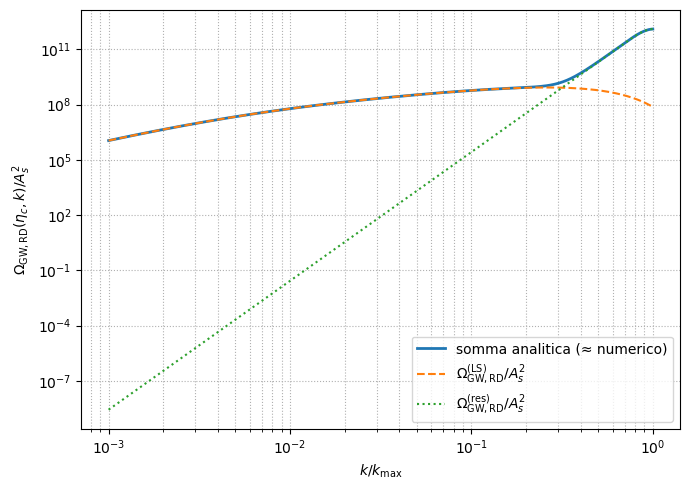

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici  # Si, Ci

# ---------- Parametri ----------
As = 1.0             # lavoriamo direttamente con Ω / As^2
eta_R = 1.0          # possiamo fissare η_R=1 (entra solo in x_R = k η_R)
xmax_R = 450.0       # x_max,R = k_max η_R = 450 (come nel paper)
sqrt3 = np.sqrt(3.0)

# ---------- Funzioni Si e Ci ----------
def Si(x):
    return sici(x)[0]

def Ci(x):
    return sici(x)[1]

# ---------- (B5): contributo large-scale ----------
def omega_LS_over_As2(xR, xmax_R=xmax_R):
    """
    Ω_GW,RD^(LS)(η_c,k) / A_s^2, Eq. (B5) per n_s = 1.
    xR = k η_R,  xmax_R = k_max η_R.
    """
    ek = xR / xmax_R  # k / k_max

    # fattore comune con le funzioni Ci e Si
    common = (4.0 * Ci(xR / 2.0)**2 +
              (np.pi - 2.0 * Si(xR / 2.0))**2) / 8.6016e10

    # polinomio nella regione k <= k_max
    poly1 = (5376.0
             - 17640.0 * ek
             + 23760.0 * ek**2
             - 16425.0 * ek**3
             + 5825.0 * ek**4
             - 847.0 * ek**5)

    # fattore nella regione k >= k_max
    poly2 = (ek**-5 *
             (2.0 - ek)**6 *
             (4.0 - 8.0 * ek - 9.0 * ek**2
              + 13.0 * ek**3 + 49.0 * ek**4))

    if xR <= xmax_R:
        shape = poly1
    else:
        shape = poly2

    # Eq. (B5): Ω ∝ [..] x_R^3 x_max,R^5
    return common * (xR**3) * (xmax_R**5) * shape

# ---------- s0(xR): Eq. (B8) ----------
def s0_xR(xR, xmax_R=xmax_R):
    """
    s_0(x_R) in Eq. (B8).
    """
    if xR <= 2.0 * xmax_R / (1.0 + sqrt3):
        return 1.0
    elif xR <= 2.0 * xmax_R / sqrt3:
        # secondo ramo: 2 x_max,R / x_R - √3
        return 2.0 * xmax_R / xR - sqrt3
    else:
        return 0.0

# ---------- (B7): contributo risonante ----------
def omega_res_over_As2(xR, xmax_R=xmax_R, Y=2.3):
    """
    Ω_GW,RD^(res)(η_c,k) / A_s^2, Eq. (B7).
    Y è il fudge factor fissato nel paper a Y = 2.3.
    """
    s = s0_xR(xR, xmax_R)
    if s == 0.0:
        return 0.0

    pref = Y * 2.30285 / 1.024e8 * np.sqrt(3.0)
    return pref * (xR**7) * s * (15.0 - 10.0 * s**2 + 3.0 * s**4)

# ---------- Griglia in k / k_max ----------
# Figura 5: k/k_max va da 1e-3 a 1
ek_vals = np.logspace(-3, 0, 400)         # ek = k/k_max
xR_vals = ek_vals * xmax_R                # x_R = ek * x_max,R

omega_LS_vals   = np.array([omega_LS_over_As2(xR) for xR in xR_vals])
omega_res_vals  = np.array([omega_res_over_As2(xR) for xR in xR_vals])
omega_tot_vals  = omega_LS_vals + omega_res_vals

# ---------- Plot ----------
plt.figure(figsize=(7,5))

# "numerical" (blu) – per ora usiamo la somma analitica come ottima approssimazione
plt.loglog(ek_vals, omega_tot_vals, label="somma analitica (≈ numerico)", lw=2)

# curve analitiche separate (come in Fig. 5)
plt.loglog(ek_vals, omega_LS_vals,  "--", label=r"$\Omega^{(\mathrm{LS})}_{\mathrm{GW,RD}}/A_s^2$")
plt.loglog(ek_vals, omega_res_vals, ":",  label=r"$\Omega^{(\mathrm{res})}_{\mathrm{GW,RD}}/A_s^2$")

plt.xlabel(r"$k/k_{\max}$")
plt.ylabel(r"$\Omega_{\mathrm{GW,RD}}(\eta_c,k)/A_s^2$")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()
